In [1]:
import pandas as pd

data = pd.read_csv('housing.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [3]:
# Crear un diccionario para mapear las categorías a valores numéricos
mapping = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}

# Aplicar el mapeo a la columna 'ocean_proximity'
data['ocean_proximity'] = data['ocean_proximity'].map(mapping)

In [4]:
data['ocean_proximity'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [5]:
data['ocean_proximity'].value_counts()

1    9136
2    6551
3    2658
0    2290
4       5
Name: ocean_proximity, dtype: int64

In [6]:
data.shape

(20640, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)  

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


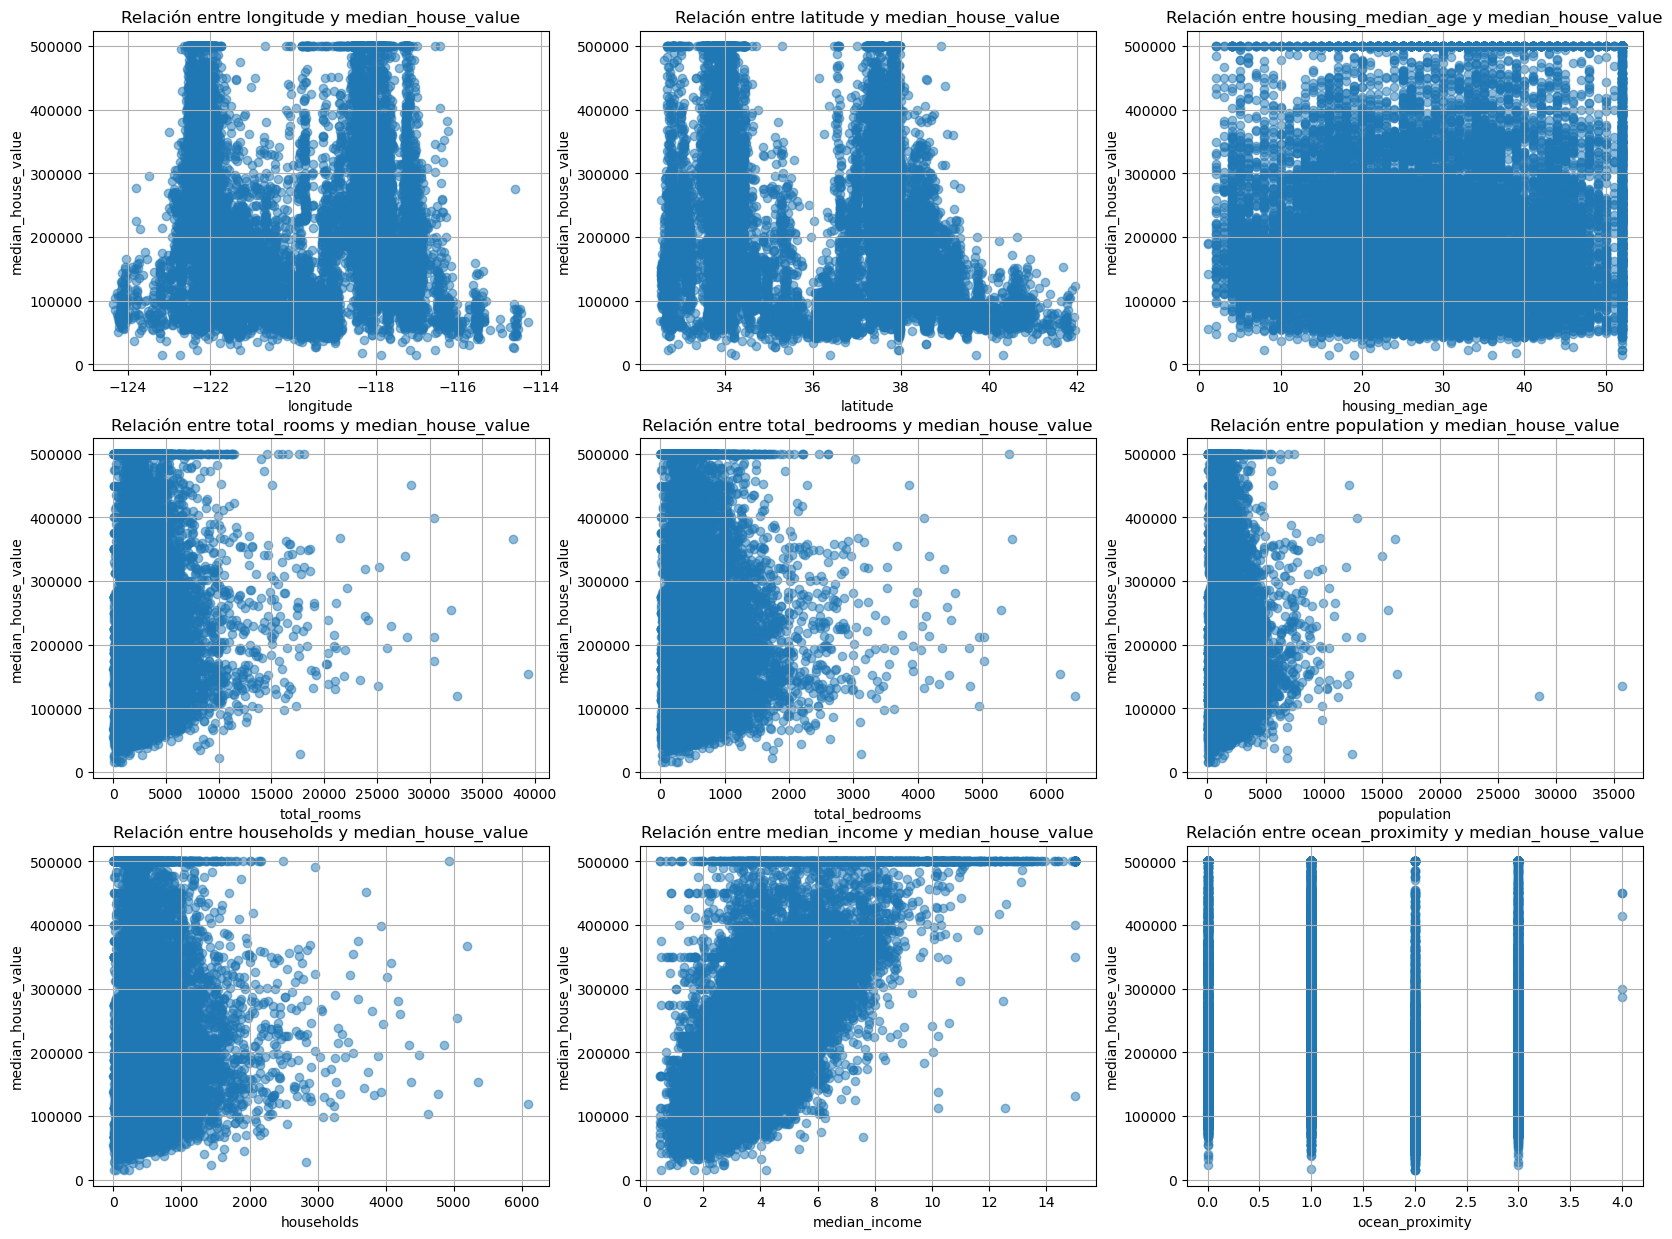

In [11]:
import matplotlib.pyplot as plt

# Detectar automáticamente las columnas del dataset que no son la variable dependiente
dependent_var = 'median_house_value'  # Cambiar dependiendo del dataset
independent_vars = [col for col in data.columns if col != dependent_var]

# Configuración del diseño de subgráficos
num_vars = len(independent_vars)
cols = 3  # Número de columnas en el diseño ajustadas automaticamente
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar los gráficos
for i, var in enumerate(independent_vars):
    ax = axes[i]
    ax.scatter(data[var], data[dependent_var], alpha=0.5)
    ax.set_title(f'Relación entre {var} y {dependent_var}')
    ax.set_xlabel(var)
    ax.set_ylabel(dependent_var)
    ax.grid()

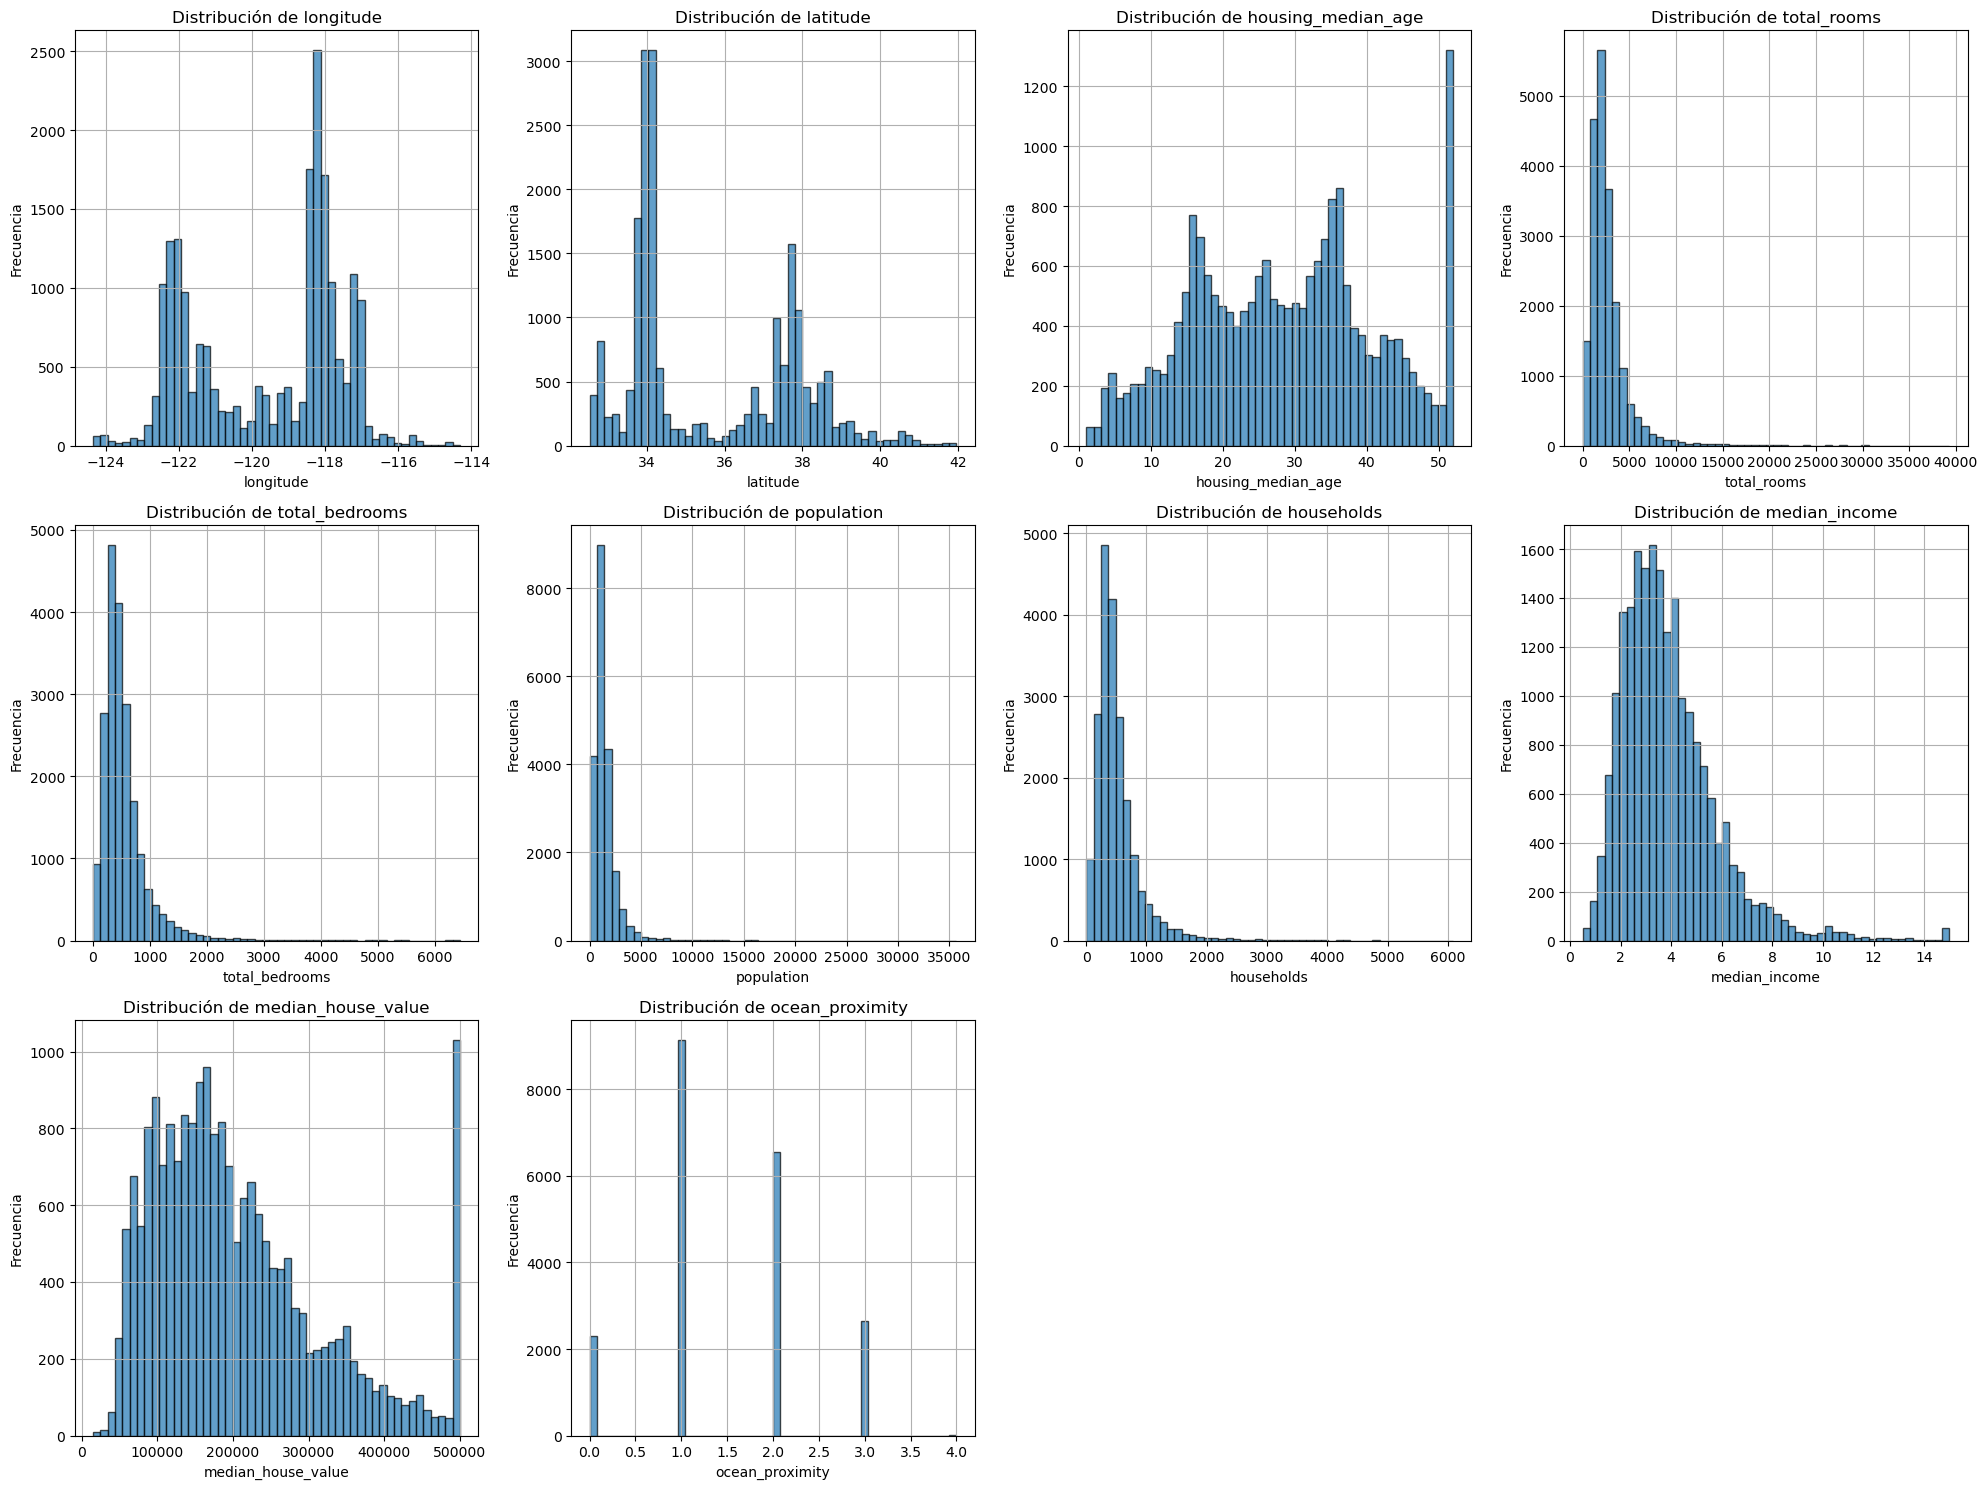

In [12]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = data.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(data[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y dependiente (y)
X = data.drop('median_house_value', axis=1)  # Variables independientes
y = data['median_house_value']  # Variable dependiente

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Bagging

In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de Bagging para regresión
bagging_model = BaggingRegressor(
    n_estimators=300,    # Número de estimadores en el ensamble
    random_state=42,
    max_samples=0.8,    # Tamaño del muestreo aleatorio
    max_features=0.8    # Porcentaje de características a seleccionar en cada modelo base
)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Predicción
y_pred_bagging = bagging_model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)

print("MSE del modelo de Bagging:", mse)
print("R² del modelo de Bagging:", r2)

MSE del modelo de Bagging: 2345366545.398334
R² del modelo de Bagging: 0.8210202628078169


## Cambiamos el modelo base

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de Bagging con un árbol de decisión como base
bagging_model = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=20),  # Árbol de decisión de profundidad 5
    n_estimators=300,  # Número de árboles en el ensamble
    random_state=42
)

bagging_model.fit(X_train, y_train)

y_pred_dt = bagging_model.predict(X_test)

# Evaluar el modelo
t_mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("MSE del modelo Bagging con Árbol de Decisión:", t_mse)
print("R² del modelo Bagging con Árbol de Decisión:", r2)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MSE del modelo Bagging con Árbol de Decisión: 2510859252.089515
R² del modelo Bagging con Árbol de Decisión: 0.8083911745278098


## Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor


# Definir el modelo de Boosting con Gradient Boosting
boosting_model = GradientBoostingRegressor(
    n_estimators=300,  # Número de modelos secuenciales
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=10,  # Profundidad de los árboles de decisión base
    random_state=42
)

# Entrenar el modelo de Boosting
boosting_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = boosting_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 2212752326.676818
R²: 0.8311403261562487


## Stacking

In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Definir los modelos base
estimators = [
    ('dt', DecisionTreeRegressor(max_depth=10, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=300))
]

# Definir el modelo de stacking con un meta-modelo de regresión lineal
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# predicciones
y_pred_stacking = stacking_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_stacking)
r2 = r2_score(y_test, y_pred_stacking)

print("MSE:", mse)
print("R²:", r2)


MSE: 2478620868.640641
R²: 0.8108513517689756
